# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** W

**Names:**

* Olivier Cloux
* Thibault Urien
* Saskia Reiss

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics


#### Exercise 2.9: Simulate an epidemic outbreak

In [1]:
# Imports
import epidemics_helper
import json
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
from networkx.readwrite import json_graph


In [2]:
# Instead of using requests, we use the json reader in networkx to be able to read and draw the graph.
with open('../data/nyc_augmented_network.json') as data_file:
    data = json.load(data_file)
    g = json_graph.node_link_graph(data)
    sir = epidemics_helper.SimulationSIR(g, beta=10.0, gamma=0.1)
    print("Number of nodes",len(g.nodes()))
    print("Number of edges",len(g.edges()))
    sir.launch_epidemic(23654,100)

Number of nodes 26481
Number of edges 43437
Epidemic stopped after 101.56 days | 101.56 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


In [3]:
def plotSIR(simu):
    # Plot the susceptible people over time
    sortedS = list(sorted(map( lambda x : min(x, simu.max_time),simu.inf_time)))
    valuesS, baseS = np.histogram(sortedS, bins=500)

    # Plot the people that have already been infected over time 
    sortedI = list(filter(lambda x : x < simu.max_time,sortedS))
    valuesI, baseI = np.histogram(sortedI, bins=500,range=[0,100])

    # Plot the recovered people over time
    sortedR = list(sorted(filter( lambda x : x < simu.max_time,simu.rec_time)))
    valuesR, baseR = np.histogram(sortedR, bins=500,range=[0,100])

    #evaluate the cumulative, to be able to have curves instead of bins.
    cumulativeS = np.cumsum(valuesS)
    cumulativeR = np.cumsum(valuesR)
    #number of people that are infected = 
    #  number of people that have been infected in the past - number of people already recovered
    cumulativeI = np.cumsum(valuesI) - cumulativeR

    # plot the cumulative susceptible function
    plt.plot(baseS[:-1], (len(sortedS)-cumulativeS)/len(sortedS) *100, c='blue', label="susceptible")
    #plot the cumulative infected function
    plt.plot(baseI[:-1],(cumulativeI )/len(sortedS) *100, c='g',label="infected")
    #plot the cumulative recovered function
    plt.plot(baseR[:-1], (cumulativeR)/len(sortedS) *100, c='red',label="recovered")

    #draw the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel("Time in days")
    plt.ylabel("Percentage of the population")
    plt.ylim([0, 100])
    plt.xlim([0, simu.max_time])
    plt.show();
    


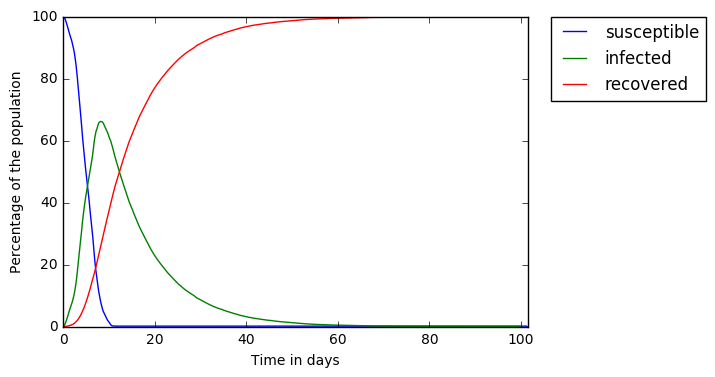

In [4]:
plotSIR(sir)

In [5]:

def nodesColor(time, simu, colors = ['blue','green','red']):
    """Helper function to return an array with the color of each nodes at given time"""
    return list(map(lambda i,r : colors[0] if time < i else (colors[1] if time < r else colors[2]),simu.inf_time,simu.rec_time))
    

In [6]:
def nyMap(time,G,simu):
    """Draw the state of the epidemic in a graph
    
        :param time: time in day
        :type time: float
        :param G: the graph to be drawn
        :type G: Graph networkx
        :param simu: the finished simulation of the epidemic
        :type simu: SimulationSIR
    """
    plt.figure(figsize=(20,20)) 
    plt.axis("off")
    positions = nx.get_node_attributes(G,'coordinates')
    nodes = nx.draw_networkx_nodes(G,positions,node_size=10)
    nodes.set_linewidth(0)
    colors = nodesColor(time,simu)
    nodes.set_color(colors)
    nx.draw_networkx_edges(G,positions)
    plt.title("State of epidemy at day "+str(time),{"fontsize":25})
    plt.show();

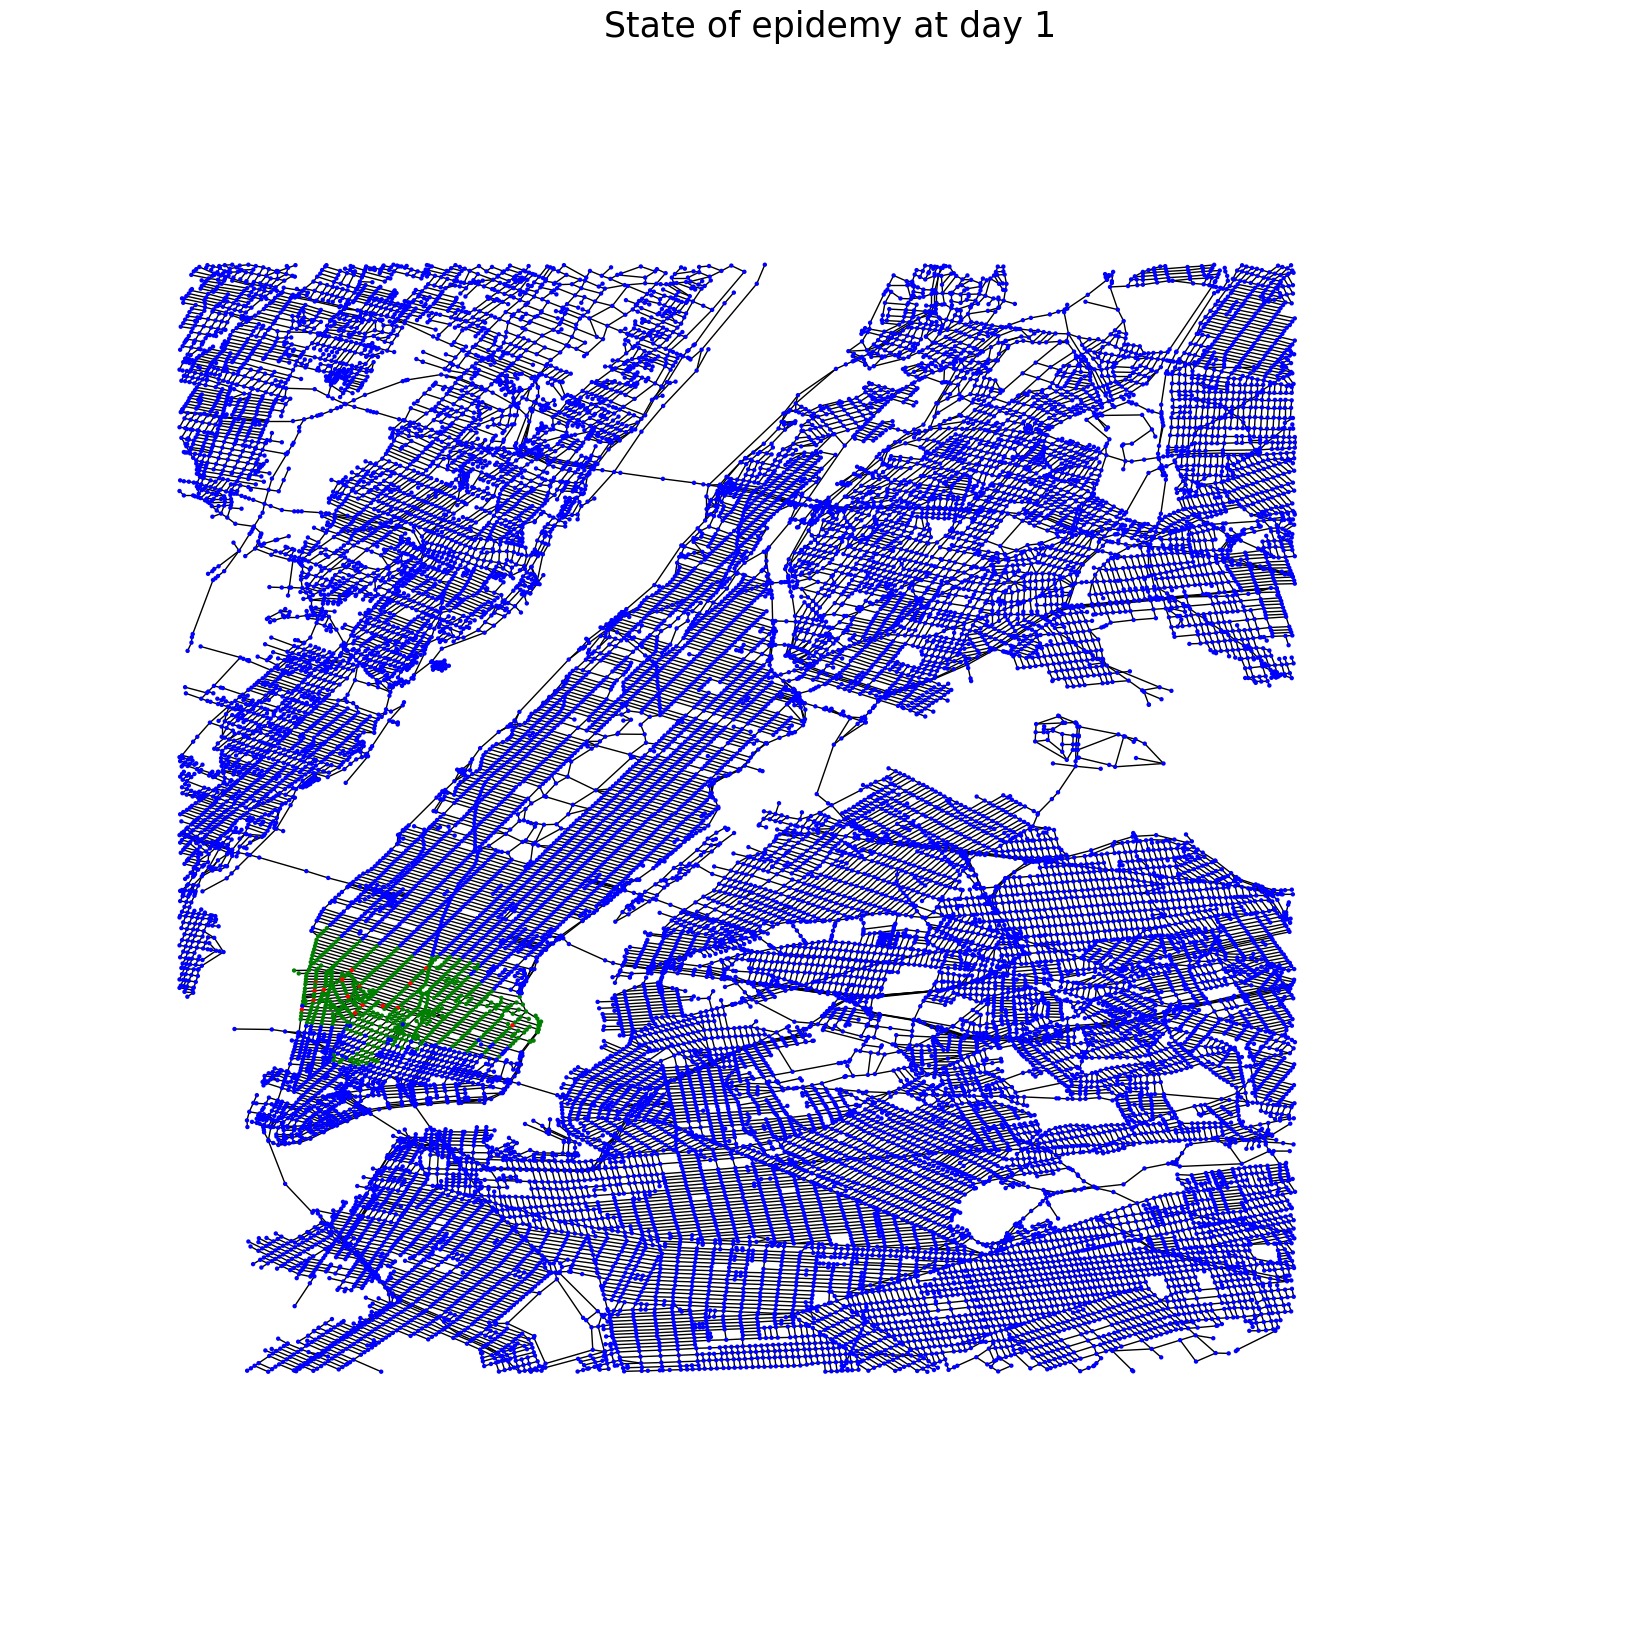

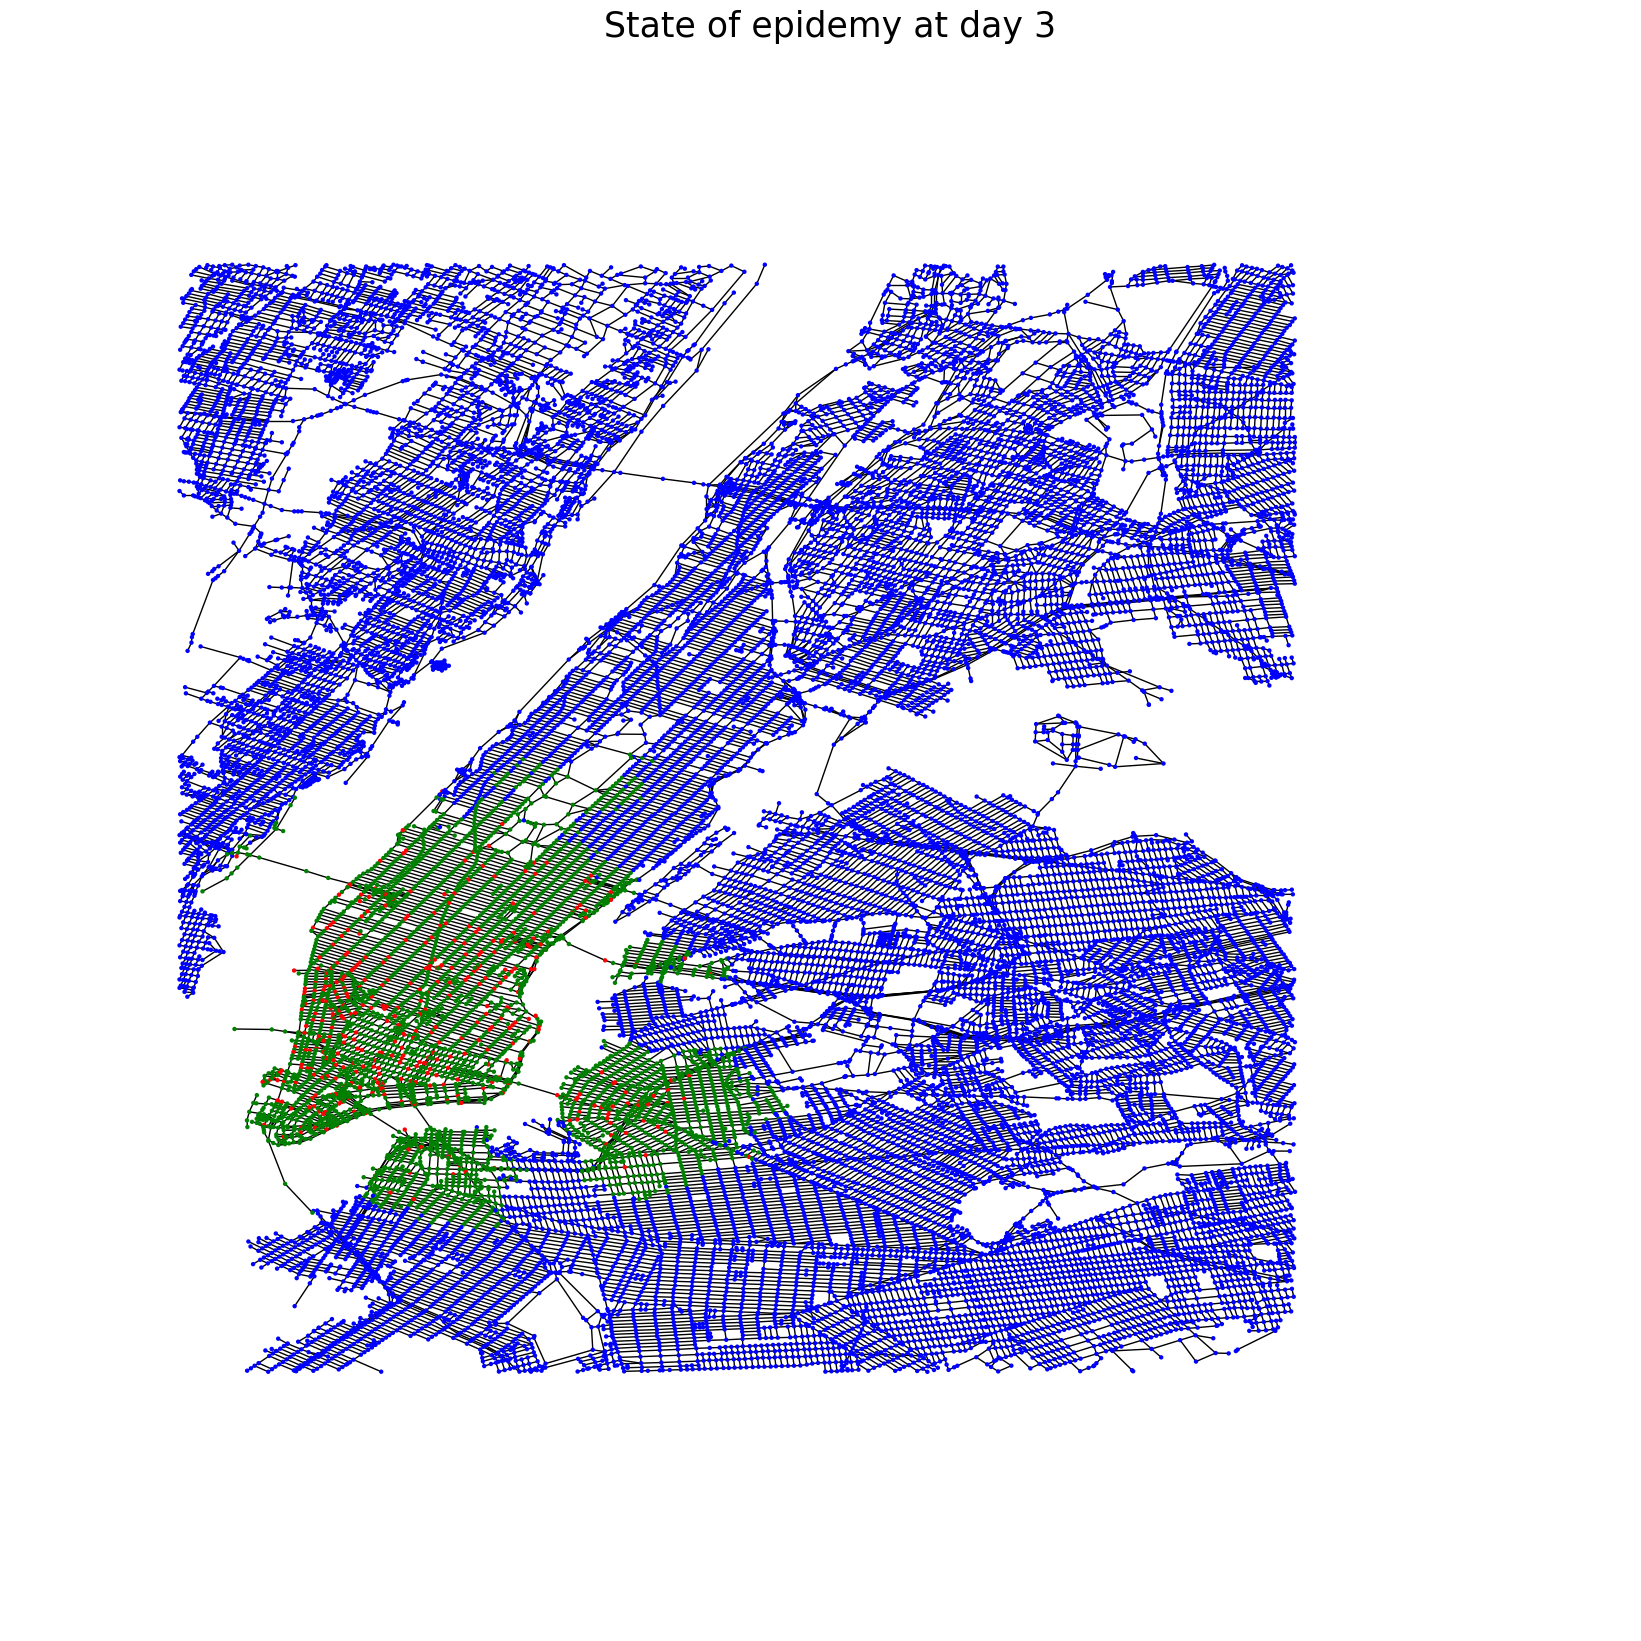

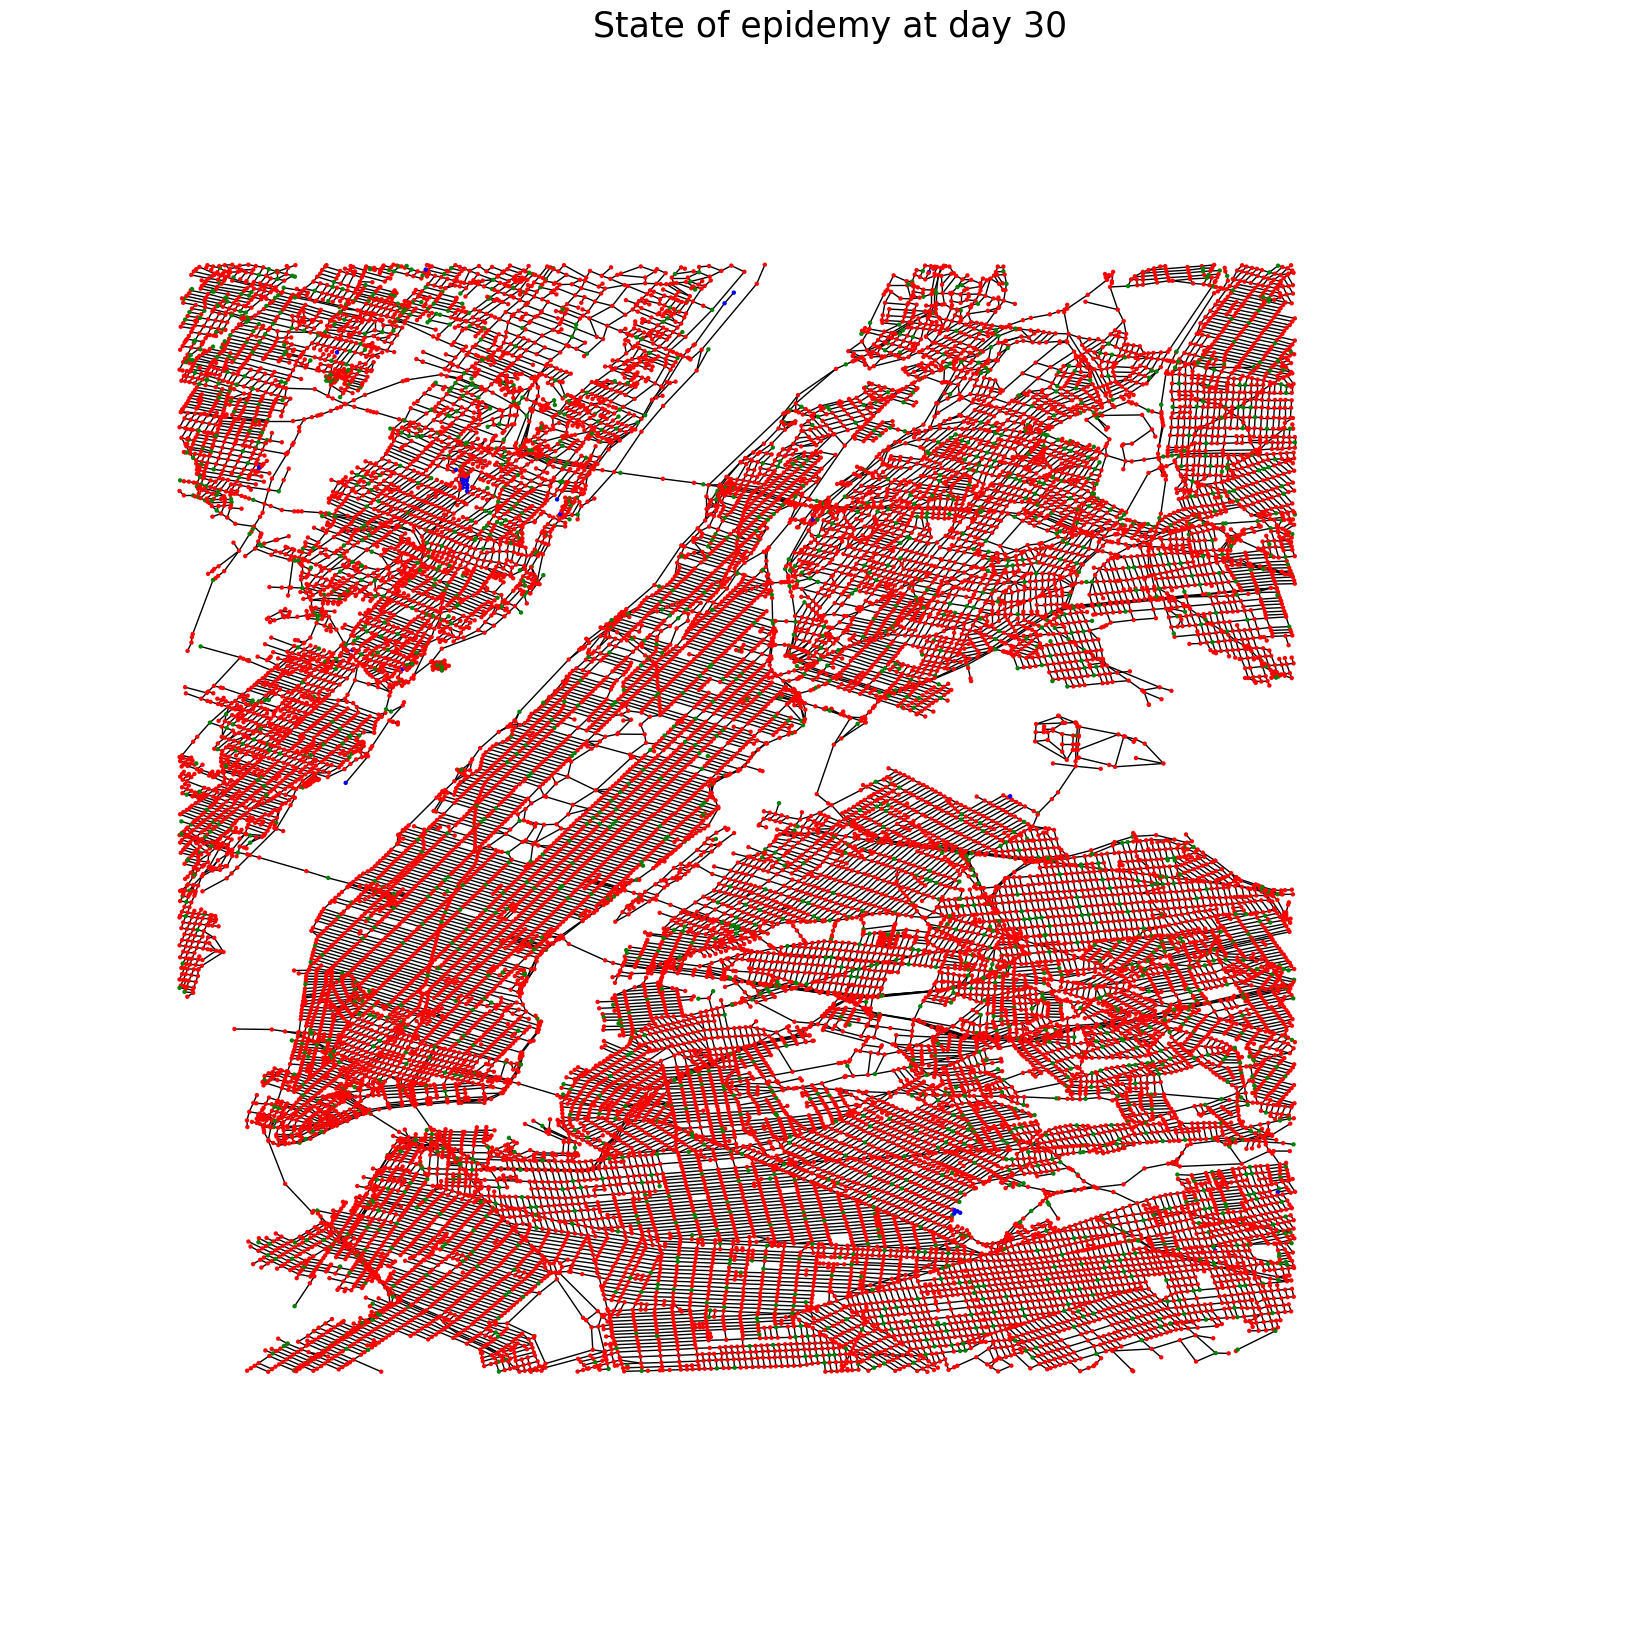

In [7]:
nyMap(1,g,sir)
nyMap(3,g,sir)
nyMap(30,g,sir)

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [8]:
def randomDelete(max, starter_node, graph):
    """Delete max edges at random in a copy of the graph and start the epidemy"""
    to_delete = []
    i = 0
    #need a copy to be able to do this several times without changing g.
    G = graph.copy()
    # This will give us a list of all edges in the type [(node1, node2), ...]
    list_edges = G.edges()
    for i in range(0, max):
        # Choose a random number between 0 and the length of our array
        x = random.randint(0, len(list_edges)-1)
        # Remove this random edge
        to_delete.append(list_edges.pop(x))
    G.remove_edges_from(to_delete)
    sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
    # Launch the simulation to see how it is after 30 days.
    sir.launch_epidemic(starter_node, 30)
    return sir


As all the simulation have random variable, we launch 3 epidemy without any modification of the graph and 3 epidemy with a random deletion of 1000 edges so we can compare.

Normal Simulation 1:
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.1% susceptible, 8.6% infected, 91.3% recovered


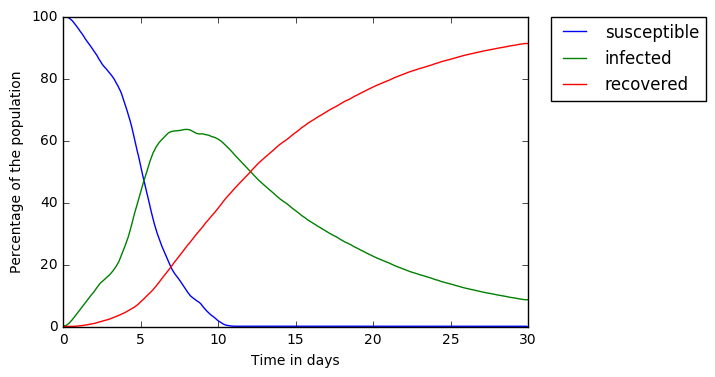

Random delete 1:
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.4% susceptible, 9.4% infected, 90.3% recovered


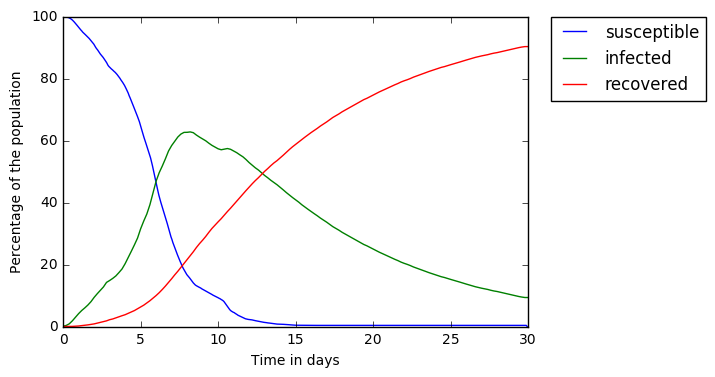

Normal Simulation 2:
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.1% susceptible, 11.2% infected, 88.7% recovered


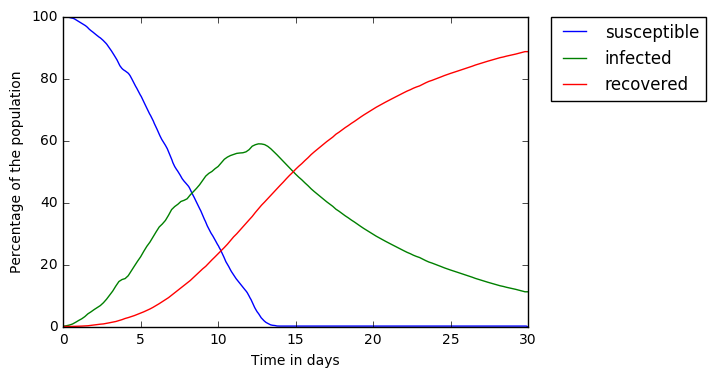

Random delete 2:
Epidemic stopped after 30.01 days | 30.01 days elapsed | 0.3% susceptible, 11.0% infected, 88.6% recovered


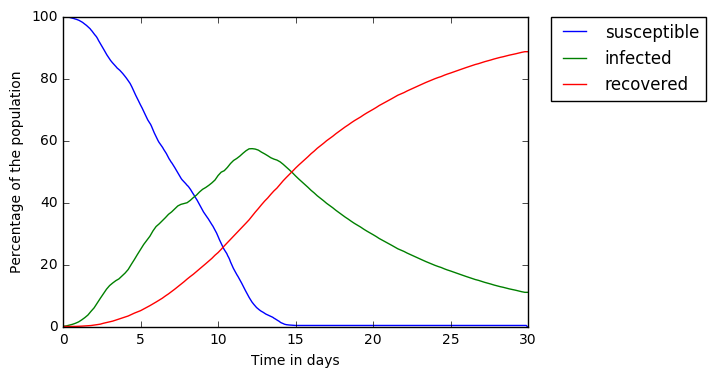

Normal Simulation 3:
Epidemic stopped after 30.01 days | 30.01 days elapsed | 0.1% susceptible, 9.8% infected, 90.2% recovered


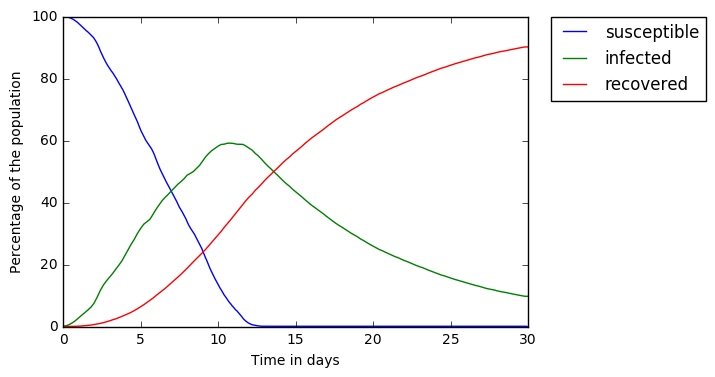

Random delete 3:
Epidemic stopped after 30.00 days | 30.00 days elapsed | 0.5% susceptible, 11.4% infected, 88.1% recovered


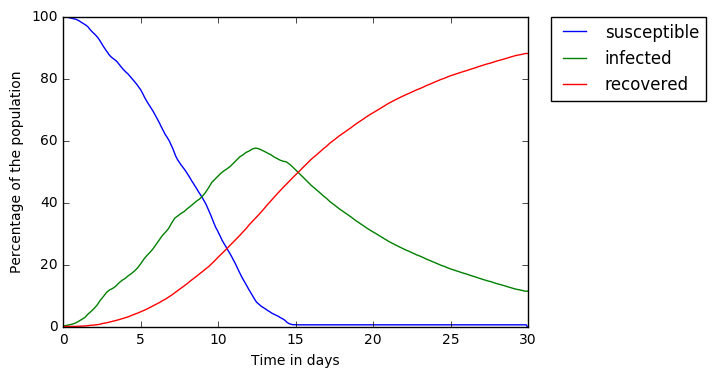

Random delete With 10000 deletions:
Epidemic stopped after 30.01 days | 30.01 days elapsed | 85.1% susceptible, 1.3% infected, 13.7% recovered


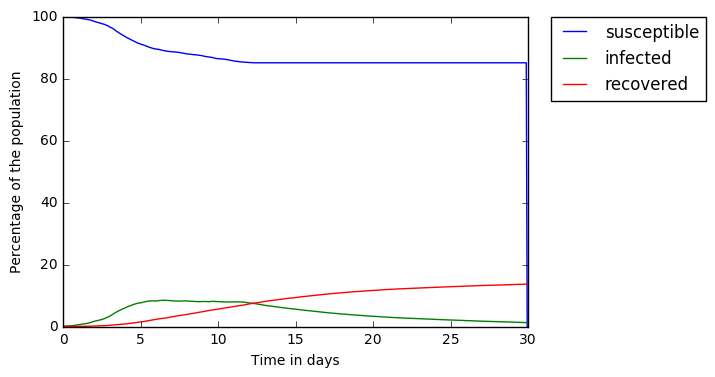

In [9]:
print("Normal Simulation 1:")
sir_n1 = epidemics_helper.SimulationSIR(g, beta=10.0, gamma=0.1)
# We will choose a random starting node and use the same for both simulations (the "normal" and the random one)
starter_node = random.sample(g.nodes(), 1).pop()
# Launch the simulation to see how it is after 30 days.
sir_n1.launch_epidemic(starter_node,30)
plotSIR(sir_n1)
print("Random delete 1:")
sir_r1 = randomDelete(1000, starter_node, g)
plotSIR(sir_r1)

starter_node = random.sample(g.nodes(), 1).pop()
print("Normal Simulation 2:")
sir_n2 = epidemics_helper.SimulationSIR(g, beta=10.0, gamma=0.1)
# Launch the simulation to see how it is after 30 days.
sir_n2.launch_epidemic(starter_node,30)
plotSIR(sir_n2)
print("Random delete 2:")
sir_r2 = randomDelete(1000, starter_node, g)
plotSIR(sir_r2)

print("Normal Simulation 3:")
sir_n3 = epidemics_helper.SimulationSIR(g, beta=10.0, gamma=0.1)
# Launch the simulation to see how it is after 30 days.
sir_n3.launch_epidemic(starter_node,30)
plotSIR(sir_n3)
print("Random delete 3:")
sir_r3 = randomDelete(1000, starter_node, g)
plotSIR(sir_r3)


print("Random delete With 10000 deletions:")
sir_rt = randomDelete(10000, starter_node, g)
plotSIR(sir_rt)

###### Conclusions
From these results, we see that deleting 1000 edges at random is not really effective. But as our graph counts 43'437 edges, it is to expect that deleting less than 3% of the edges at random has no big effect. 
Deleting 10'000 edges at random makes a big difference but we could probably do even better.


#### Exercise 2.11: Strategy 2

In [10]:
def immunizeBridges(G,budget):
    """Cut all bridges of graph g. Bridges are nodes of degree 2"""
    returned = G.copy()
    
    def isDeg2(node):
        return(len(set(returned.neighbors(node))) == 2)
    def isDeg1(node):
        return(len(set(returned.neighbors(node))) <= 1)

    i = budget
    
    removedEdge = []
    while(i>0):
        # collapsing dead end so we can ignore them.
        deg1 = set(filter(isDeg1,returned.nodes()))
        while(deg1):
            returned.remove_nodes_from(deg1)
            deg1 = set(filter(isDeg1,returned.nodes()))
            
        deg2 = set(filter(isDeg2,returned.nodes()))
        # To prove that the program is not stuck.
        print('\r', "Remaining budget :"+str(i),sep='', end='', flush=True)
        if(len(deg2) > 0):    
            # if there are nodes of degree exactly two, we assume they are bridges and cut one of their edges at random.
            # each time we cut a bridge, we may create new bridges we want to cut but also new dead ends.
            # To avoid wasting budget on dead end cutting, we only cut one edge by iteration. 
            # It is slow and unoptimized but we are sure to get the result we want.
            v = random.sample(deg2,1)[0]
            e = returned.edges(v)[random.randint(0, 1)]
            deg2 = deg2.difference(e)
            removedEdge += [e]
            i-=1     
            returned.remove_edge(e[0],e[1])
        else :
            # if even collapsing dead ends do not reaveal new bridges, just cut edges at random to use the rest of the budget.
            print("cut", i , "edges at random")
            i = 0
            removedEdge += random.sample(returned.edges(),i)
    print('\r', "finished!", sep='', end='', flush=True)
    returned = G.copy()
    returned.remove_edges_from(removedEdge)
    return returned 
    

In [11]:
imunizedG = immunizeBridges(g,2500)

finished!

Epidemic stopped after 52.82 days | 52.82 days elapsed | 99.2% susceptible, 0.0% infected, 0.8% recovered


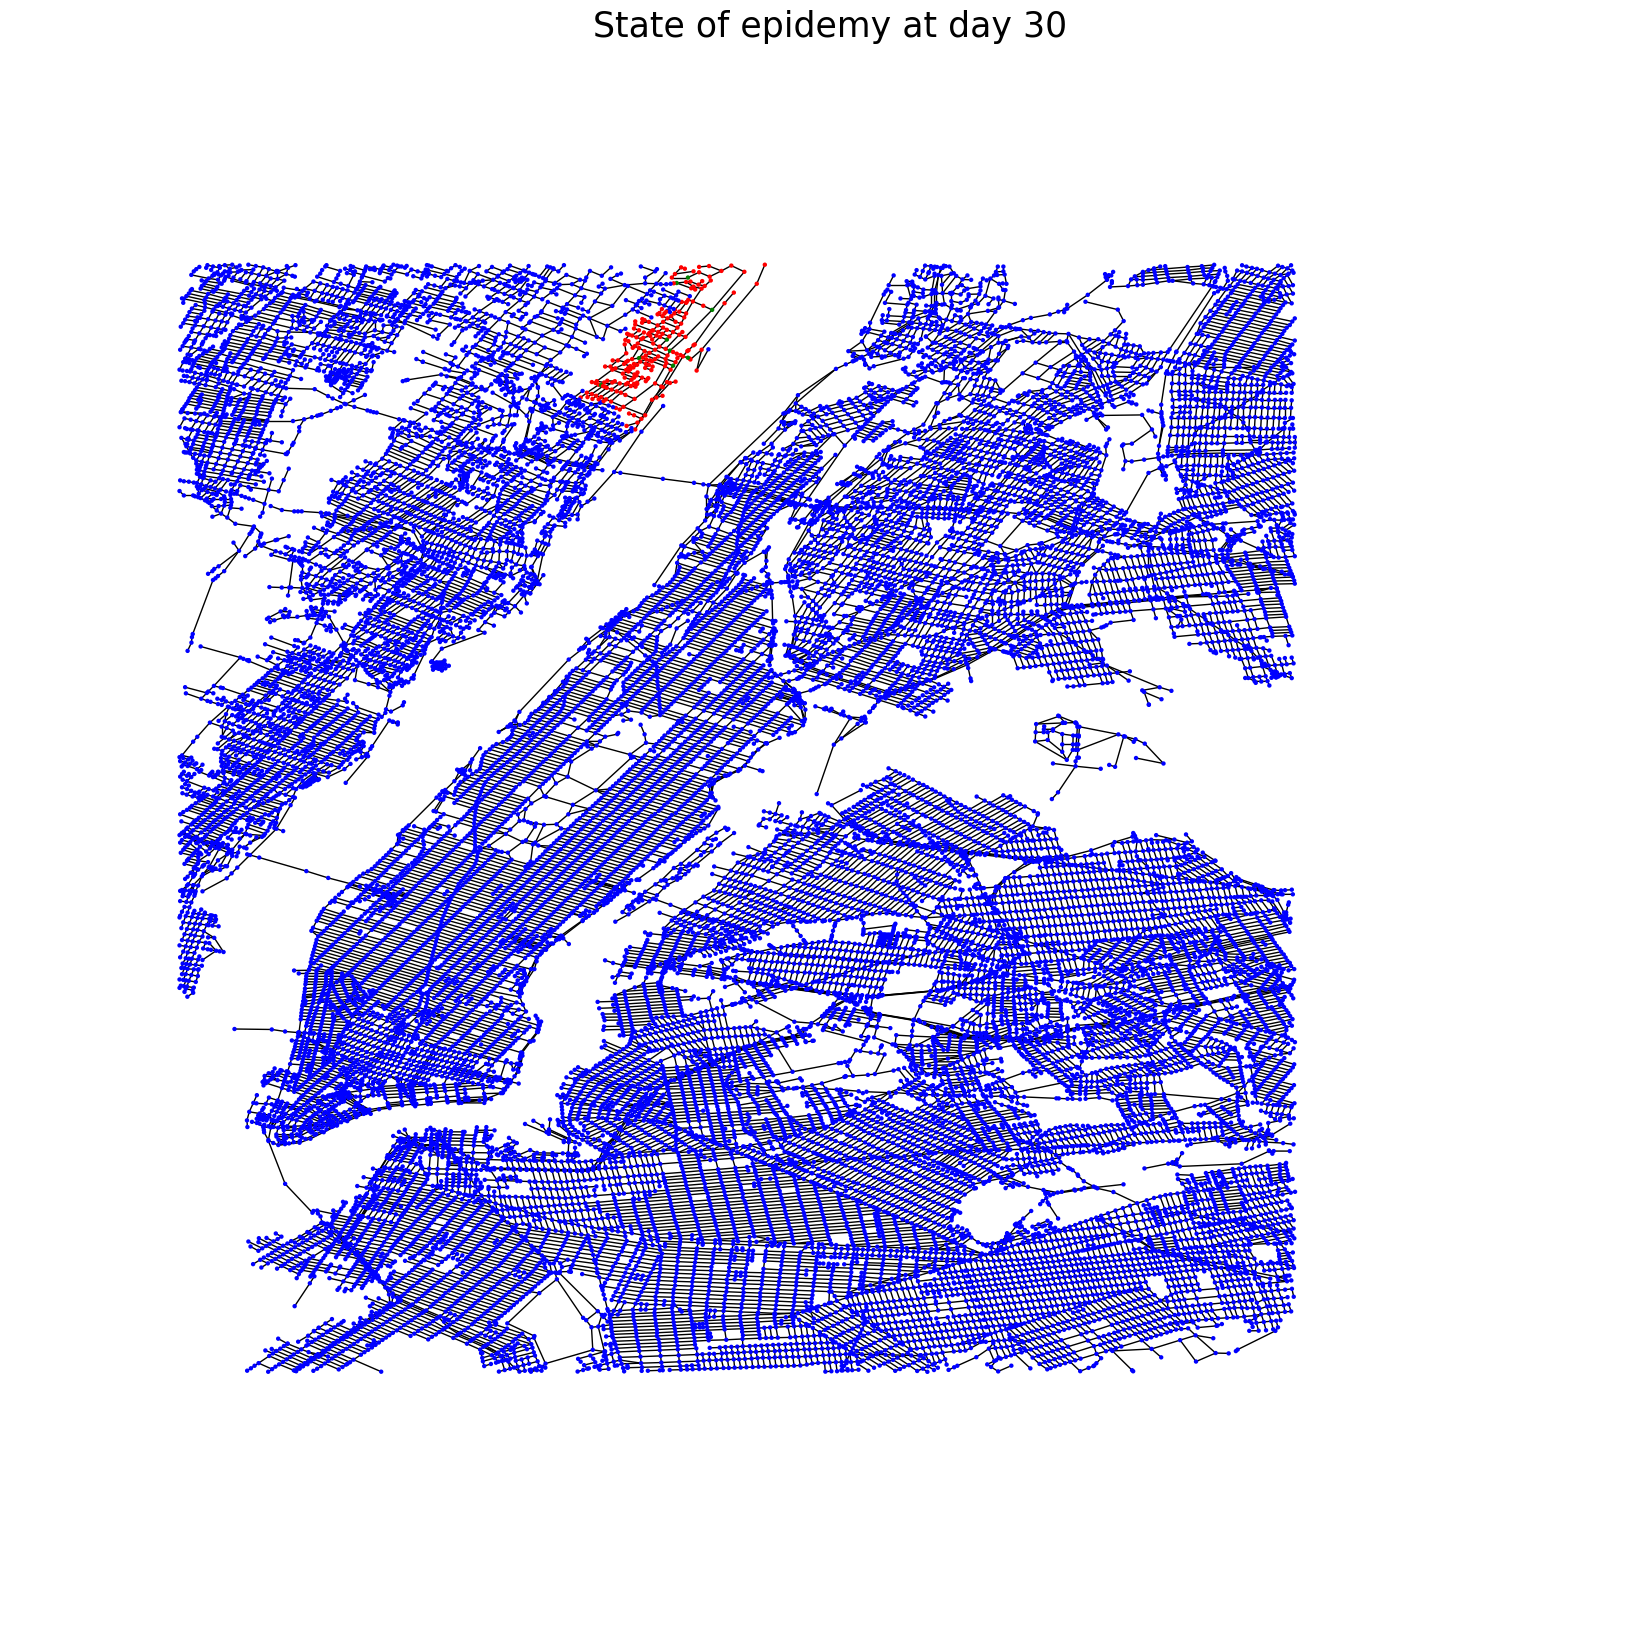

In [18]:
starter_node = random.sample(imunizedG.nodes(), 1).pop()
simu2 = epidemics_helper.SimulationSIR(imunizedG, beta=10.0, gamma=0.1)
simu2.launch_epidemic(starter_node,100)
nyMap(30,imunizedG,simu2)

In [13]:
avgSaved = 0
numberOfTests = 100
for i in range(1 ,numberOfTests):
    starter_node = random.sample(imunizedG.nodes(), 1).pop()
    simu2 = epidemics_helper.SimulationSIR(imunizedG, beta=10.0, gamma=0.1)
    simu2.launch_epidemic(starter_node,100)
    avgSaved += np.sum(simu2.status==0) * 100. / simu2.n_nodes 
print("On",numberOfTests,"epidemics, on average we managed to save",avgSaved/ numberOfTests,"% of the population.")

Epidemic stopped after 101.93 days | 101.93 days elapsed | 87.2% susceptible, 0.0% infected, 12.8% recovered
Epidemic stopped after 78.34 days | 78.34 days elapsed | 98.8% susceptible, 0.0% infected, 1.2% recovered
Epidemic stopped after 94.88 days | 94.88 days elapsed | 55.7% susceptible, 0.0% infected, 44.3% recovered
Epidemic stopped after 105.24 days | 105.24 days elapsed | 55.9% susceptible, 0.0% infected, 44.1% recovered
Epidemic stopped after 104.88 days | 104.88 days elapsed | 56.0% susceptible, 0.0% infected, 44.0% recovered
Epidemic stopped after 0.00 days | 0.00 days elapsed | 100.0% susceptible, 0.0% infected, 0.0% recovered
Epidemic stopped after 39.34 days | 39.34 days elapsed | 99.9% susceptible, 0.0% infected, 0.1% recovered
Epidemic stopped after 97.71 days | 97.71 days elapsed | 66.5% susceptible, 0.0% infected, 33.5% recovered
Epidemic stopped after 87.83 days | 87.83 days elapsed | 55.8% susceptible, 0.0% infected, 44.2% recovered
Epidemic stopped after 104.08 days 

###### Conclusions
Our method achieves a pretty good score. We use the specific topology of the graph that has a lot of islands. Even if our average is higher, you can notice that pretty often, 45% of the population dies. This is because after cutting the graph, there remains one connected component that represents 45% of the graph alone. The chance of having the epidemy starting here is less than a half. Moreover, if the epidemic does not start there, we get really good results (surviving rate > 80%) as all our other connected components are quite small. 

Let's try to compute the exepected percentage of infected + dead people at day 30, assuming we have a big component containing 45% of the population and that all other connected components contain on average 15% of the population.
Let D be our random variable counting percentage of infected + dead people at day 30.
E(D) = 0.45 * 45% + 0.55 * 15% = 28,5 %
That gives us an expected survival rate of 71,5% percent, which is quite close to what we got experimentally.

If the goal is to maximize the average, this strategy probably yields better result than cutting the graph in components of even size. This is probably due to the fact that for this graph, with this budget, an even partition gives you three components with aproximately the same size and so a survival rate of aproximately 1-1/3 = 66%.